In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import arviz as az
plt.style.use('science')

import sys
import os
sys.path.append('../scripts/python')

from parameter_estimation import BivariateBeta

In [11]:
data = pd.read_csv('../data/microdados_enem_2021/DADOS/MICRODADOS_ENEM_2021.csv', encoding='latin', sep=';')
data = data[(data['TP_PRESENCA_CH']==1)&(data['TP_PRESENCA_LC']==1)&(data['TP_PRESENCA_MT']==1)&data['TP_PRESENCA_CN']==1]

In [20]:
def fun(x, y):
    s = 0
    for i in range(len(x)):
        if x[i] == y[i]:
            s += 1
    return s 

data['N_ACERTOS_CH'] = data.apply(lambda x: fun(x['TX_RESPOSTAS_CH'], x['TX_GABARITO_CH']), axis=1)/45
data['N_ACERTOS_LC'] = data.apply(lambda x: fun(x['TX_RESPOSTAS_LC'], x['TX_GABARITO_LC']), axis=1)/45
data['N_ACERTOS_CN'] = data.apply(lambda x: fun(x['TX_RESPOSTAS_CN'], x['TX_GABARITO_CN']), axis=1)/45
data['N_ACERTOS_MT'] = data.apply(lambda x: fun(x['TX_RESPOSTAS_MT'], x['TX_GABARITO_MT']), axis=1)/45

In [22]:
data = data[['N_ACERTOS_CH', 'N_ACERTOS_LC', 'N_ACERTOS_CN', 'N_ACERTOS_MT', 'CO_MUNICIPIO_PROVA']]

In [27]:
data = data.groupby('CO_MUNICIPIO_PROVA').mean()

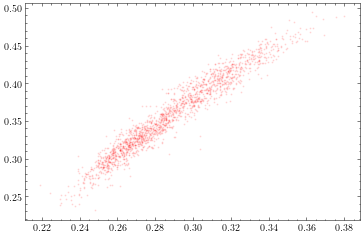

(35.35309265380576, 8.986825312649937e-274)

In [42]:
x = data['N_ACERTOS_CN']
y = data['N_ACERTOS_CH']
plt.scatter(x,y, s=1, alpha=0.1, color='red')
plt.show()

alpha_hat = BivariateBeta().method_moments_estimator_1(x,y)#, alpha0=(1,1,1,1))
BivariateBeta().marginal_diagnostic(x,y)

In [43]:
alpha_hat

array([ 83.10970646,   0.        ,  11.72222176, 176.87722527])

In [34]:
m1 = data['N_ACERTOS_CN'].mean()
m2 = data['N_ACERTOS_MT'].mean()
v1 = data['N_ACERTOS_CN'].var()
v2 = data['N_ACERTOS_MT'].var()
print(m1, m2, v1, v2)

0.28853720137817135 0.2657112356501128 0.0007714904689724487 0.0015243312377728104


In [35]:
m1*(1-m1)*v2 - m2*(1-m2)*v1

0.00016239546823023176

In [37]:
alpha_hat

array([4.86790891e+01, 2.67199766e+00, 4.67078722e-22, 1.29141790e+02])

C:\Users\lucas\Documents\Github\bivariate-beta\notebooks\../scripts/python\parameter_estimation.py:85: RuntimeWarning: divide by zero encountered in double_scalars
  return result/c


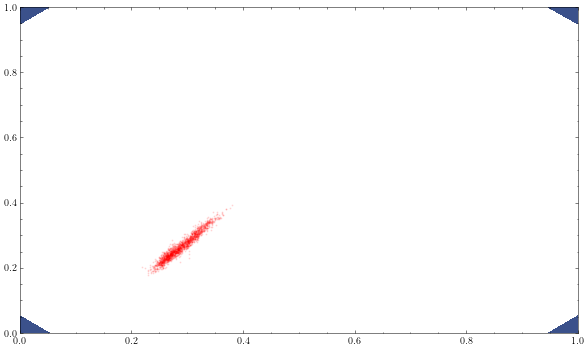

In [36]:
axis1 = np.linspace(0,1,20)
axis2 = np.linspace(0,1,20)
z = np.zeros((20,20))

for i in range(20):
    for j in range(20):
        z[j,i] = BivariateBeta(alpha_hat).pdf(axis1[i], axis2[j])
        
X, Y = np.meshgrid(axis1, axis2)

fig, ax = plt.subplots(figsize=(10,6))
c = ax.contourf(X, Y, z, levels=50)

ax.scatter(x,y, s=1, alpha=0.1, color='red')